# Predicting class of Iris flower dataset using Support vector classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris_csv.csv')

In [3]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

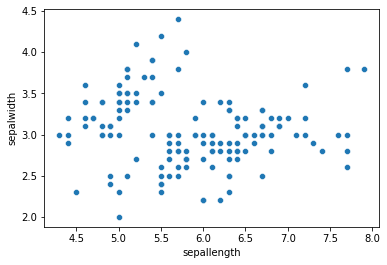

In [4]:
sns.scatterplot(df.sepallength,df.sepalwidth)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Check value counts for each class**

In [6]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

**Check duplicated values**

In [7]:
df.duplicated().sum()

3

In [8]:
#drop duplicate values
df.drop_duplicates()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.isna().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

In [10]:
df.shape

(150, 5)

**Check correlation between all variables**

In [11]:
df.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


**Label encoding for target variable**

**We prefer label encoding only for independent variables, here we want to see scatter plot so we did label encoding for target variable**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df['class'] = le.fit_transform(df['class'])

In [15]:
df
# 0 setosa
# 1 versicolor
# 2 virginica

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df.corr()
#correlation between independant and dependant variable

,sepallength,sepalwidth,petallength,petalwidth,class
sepallength,1.000000,-0.109369,0.871754,0.817954,0.782561
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petallength,0.871754,-0.420516,1.000000,0.962757,0.949043
petalwidth,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


**check if data is linearly separable by plotting scatterplot**

**kernel is not required**

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

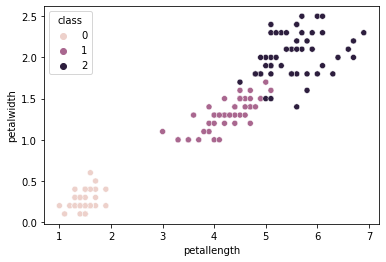

In [18]:
sns.scatterplot(df['petallength'],df['petalwidth'],hue=df['class'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

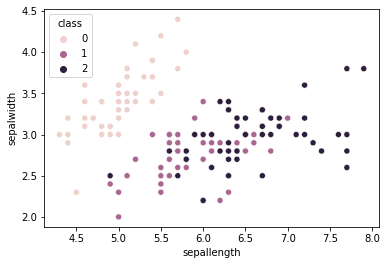

In [19]:
sns.scatterplot(df['sepallength'],df['sepalwidth'],hue=df['class'])

In [20]:
x = df.drop(['class'],axis=1)

In [21]:
y = df['class']

In [22]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

**countplot for dependent variable to check if data is balanced or imbalanced**

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

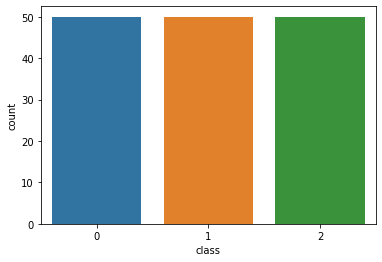

In [23]:
sns.countplot(y)

In [24]:
from sklearn.model_selection import train_test_split

**Split dataset into train , test**

In [25]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

**Fit support vector classifier**

In [27]:
from sklearn.svm import SVC

In [28]:
sc = SVC()

In [29]:
sc.fit(x_train,y_train)

SVC()

**Prdiction on testing data**

In [32]:
pred = sc.predict(x_test)

In [41]:
pred.shape

(45,)

**prediction for First five data points in training data**

In [33]:
pred[0:5]
#predicted values

array([2, 1, 2, 0, 1])

**prediction on test data**

In [34]:
y_test[0:5]
#actual values

77     1
74     1
143    2
19     0
71     1
Name: class, dtype: int32

In [43]:
y_test.shape

(45,)

# Evaluation metric

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
print(confusion_matrix(pred,y_test))

[[16  0  0]
 [ 0 13  1]
 [ 0  2 13]]


In [31]:
x_test.shape

(45, 4)

In [38]:
y_test.shape

(45,)

**Accuracy score**

In [36]:
print(accuracy_score(pred,y_test)*100)

93.33333333333333


**Classification report**

In [37]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.93      0.90        14
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [39]:
output = sc.predict([[6,4,9,1]])

if output == 0:
    print('This measurement signifies flower class of setosa')
elif output == 1:
    print('This measurement signifies flower class of Versicolor')
elif output == 2:
    print('This measurement signifies flower class of Virginica')

This measurement signifies flower class of Virginica
